## Class Act 8: Delaunay Triangulation - Bowyer-Watson Algorithm
Analysis and Design of Advanced Algorithms \
Group #607 \
Team 3\
Luis Salomón Flores Ugalde

Santiago Quintana Moreno A01571222\
Miguel Ángel Álvarez Hermida A01722925

Import Libraries and Load Data

In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os

notebook_dir = os.getcwd()

def read_points_from_file(filename):
    points = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        n = int(lines[0].strip())
        for i in range(1, n + 1):
            line = lines[i].strip()
            parts = line.split()
            x = float(parts[0])
            y = float(parts[1])
            points.append((x, y))
    return points

input_file = os.path.join(notebook_dir, "puntos-n11_2.txt")
points = read_points_from_file(input_file)

print(f"Loaded {len(points)} points:")
for i, (x, y) in enumerate(points, 1):
    print(f"  Point {i}: ({x}, {y})")

Loaded 11 points:
  Point 1: (1.0, 1.0)
  Point 2: (2.0, 4.0)
  Point 3: (3.0, 2.5)
  Point 4: (4.0, 4.2)
  Point 5: (4.3, 3.0)
  Point 6: (4.1, 2.3)
  Point 7: (5.8, 4.0)
  Point 8: (6.1, 3.0)
  Point 9: (6.0, 5.2)
  Point 10: (6.2, 1.8)
  Point 11: (7.5, 2.8)


---
## Problem 1: Points and Triangles

In [2]:
def create_super_triangle(points):
    if not points:
        return [(0, 0), (1, 0), (0, 1)]
    
    min_x = min(p[0] for p in points)
    max_x = max(p[0] for p in points)
    min_y = min(p[1] for p in points)
    max_y = max(p[1] for p in points)
    
    dx = max_x - min_x
    dy = max_y - min_y
    delta_max = max(dx, dy)
    mid_x = (min_x + max_x) / 2
    mid_y = (min_y + max_y) / 2
    
    margin = delta_max * 10
    
    p1 = (mid_x - margin, mid_y - margin)
    p2 = (mid_x + margin, mid_y - margin)
    p3 = (mid_x, mid_y + margin * 1.732)
    
    return [p1, p2, p3]

super_tri = create_super_triangle(points)

print("Super triangle vertices:")
for i, vertex in enumerate(super_tri, 1):
    print(f"  Vertex {i}: ({vertex[0]:.2f}, {vertex[1]:.2f})")

Super triangle vertices:
  Vertex 1: (-60.75, -61.90)
  Vertex 2: (69.25, -61.90)
  Vertex 3: (4.25, 115.68)


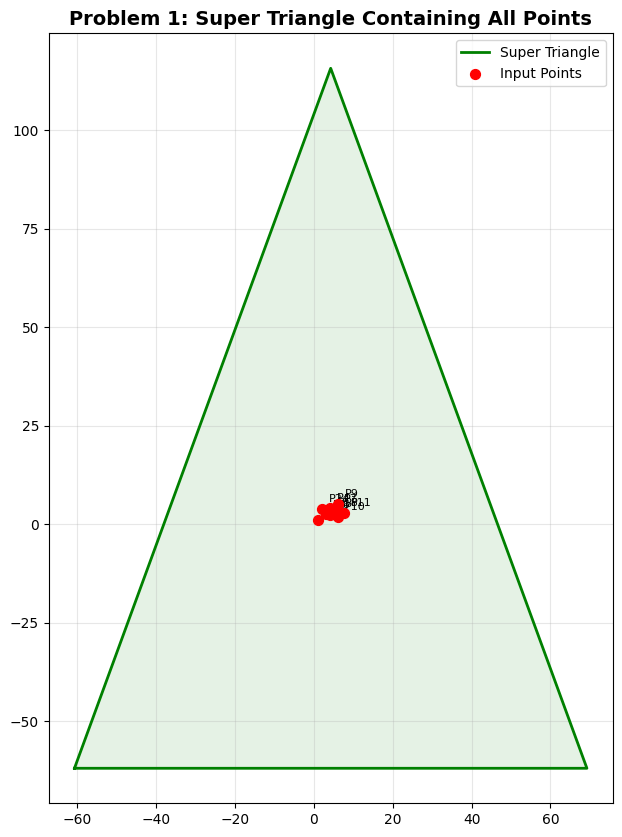

In [3]:
# Visualize Problem 1
fig, ax = plt.subplots(figsize=(10, 10))

xs = [super_tri[0][0], super_tri[1][0], super_tri[2][0], super_tri[0][0]]
ys = [super_tri[0][1], super_tri[1][1], super_tri[2][1], super_tri[0][1]]
ax.plot(xs, ys, 'g-', linewidth=2, label='Super Triangle')
ax.fill(xs, ys, alpha=0.1, color='green')

if points:
    pts_x, pts_y = zip(*points)
    ax.scatter(pts_x, pts_y, c='red', s=50, zorder=5, label='Input Points')
    for i, (x, y) in enumerate(points, 1):
        ax.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax.set_aspect('equal')
ax.set_title('Problem 1: Super Triangle Containing All Points', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.show()

---
## Problem 2: The Circumscribed Circle

In [4]:
def calculate_circumcircle(p1, p2, p3):
    """Calculate the circumscribed circle for a triangle."""
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    ax = x2 - x1
    ay = y2 - y1
    bx = x3 - x1
    by = y3 - y1
    
    d = 2 * (ax * by - ay * bx)
    
    if abs(d) < 1e-10:
        return None
    
    ux = (by * (ax * ax + ay * ay) - ay * (bx * bx + by * by)) / d
    uy = (ax * (bx * bx + by * by) - bx * (ax * ax + ay * ay)) / d
    
    center_x = x1 + ux
    center_y = y1 + uy
    radius = math.sqrt(ux * ux + uy * uy)
    
    return (center_x, center_y, radius)

# Calculate circumcircle for first 3 points
if len(points) >= 3:
    test_triangle = [points[0], points[1], points[2]]
    circle = calculate_circumcircle(points[0], points[1], points[2])
    if circle:
        print(f"Triangle: P1={points[0]}, P2={points[1]}, P3={points[2]}")
        print(f"Circumcircle Center: ({circle[0]:.4f}, {circle[1]:.4f})")
        print(f"Circumcircle Radius: {circle[2]:.4f}")

Triangle: P1=(1.0, 1.0), P2=(2.0, 4.0), P3=(3.0, 2.5)
Circumcircle Center: (1.4167, 2.5278)
Circumcircle Radius: 1.5836


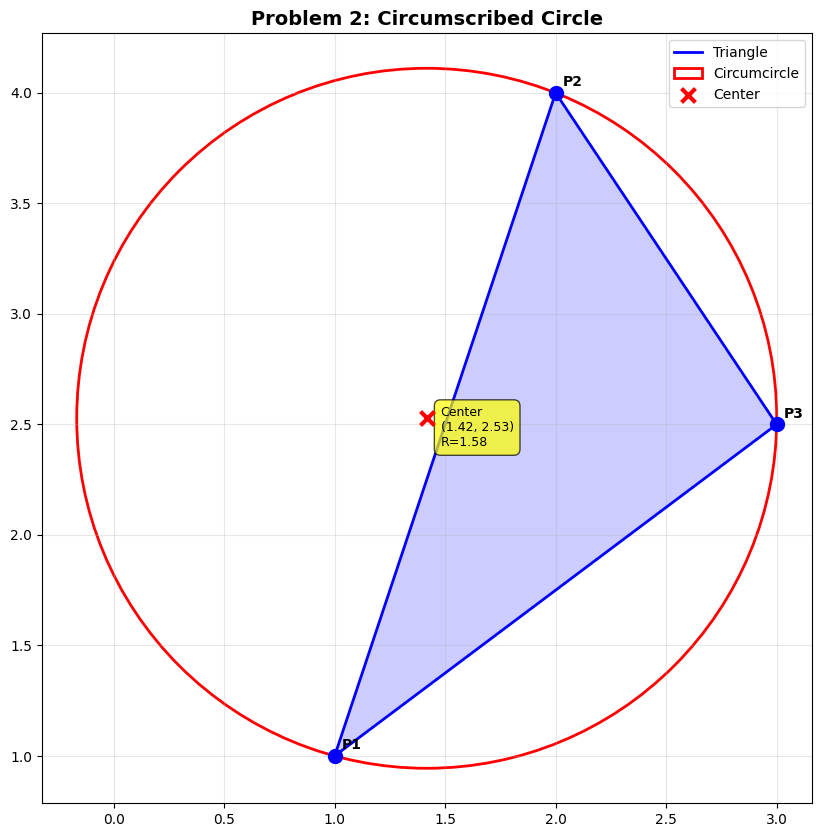

In [5]:
# Visualize Problem 2
fig, ax = plt.subplots(figsize=(10, 10))

xs = [test_triangle[0][0], test_triangle[1][0], test_triangle[2][0], test_triangle[0][0]]
ys = [test_triangle[0][1], test_triangle[1][1], test_triangle[2][1], test_triangle[0][1]]
ax.plot(xs, ys, 'b-', linewidth=2, label='Triangle')
ax.fill(xs, ys, alpha=0.2, color='blue')

for i, (x, y) in enumerate(test_triangle, 1):
    ax.scatter(x, y, c='blue', s=100, zorder=5)
    ax.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

if circle:
    center_x, center_y, radius = circle
    circ = Circle((center_x, center_y), radius, fill=False, edgecolor='red', linewidth=2, label='Circumcircle')
    ax.add_patch(circ)
    ax.scatter(center_x, center_y, c='red', s=100, marker='x', linewidths=3, zorder=6, label='Center')
    ax.annotate(f'Center\n({center_x:.2f}, {center_y:.2f})\nR={radius:.2f}', 
               (center_x, center_y), xytext=(10, -20), textcoords='offset points', 
               fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.set_aspect('equal')
ax.set_title('Problem 2: Circumscribed Circle', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.show()

---
## Problem 3: Points Inside Circles

In [6]:
def point_in_circumcircle(point, triangle):
    circle = calculate_circumcircle(triangle[0], triangle[1], triangle[2])
    
    if circle is None:
        return False
    
    center_x, center_y, radius = circle
    px, py = point
    
    dist = math.sqrt((px - center_x) ** 2 + (py - center_y) ** 2)
    return dist < radius + 1e-10

test_triangle = [points[0], points[1], points[2]]
test_pts = []

print(f"Testing points against circumcircle of triangle P1-P2-P3:")
for i in range(3, min(6, len(points))):
    is_inside = point_in_circumcircle(points[i], test_triangle)
    print(f"  Point {i+1} {points[i]} is {'INSIDE' if is_inside else 'OUTSIDE'} the circumcircle")
    test_pts.append(points[i])

Testing points against circumcircle of triangle P1-P2-P3:
  Point 4 (4.0, 4.2) is OUTSIDE the circumcircle
  Point 5 (4.3, 3.0) is OUTSIDE the circumcircle
  Point 6 (4.1, 2.3) is OUTSIDE the circumcircle


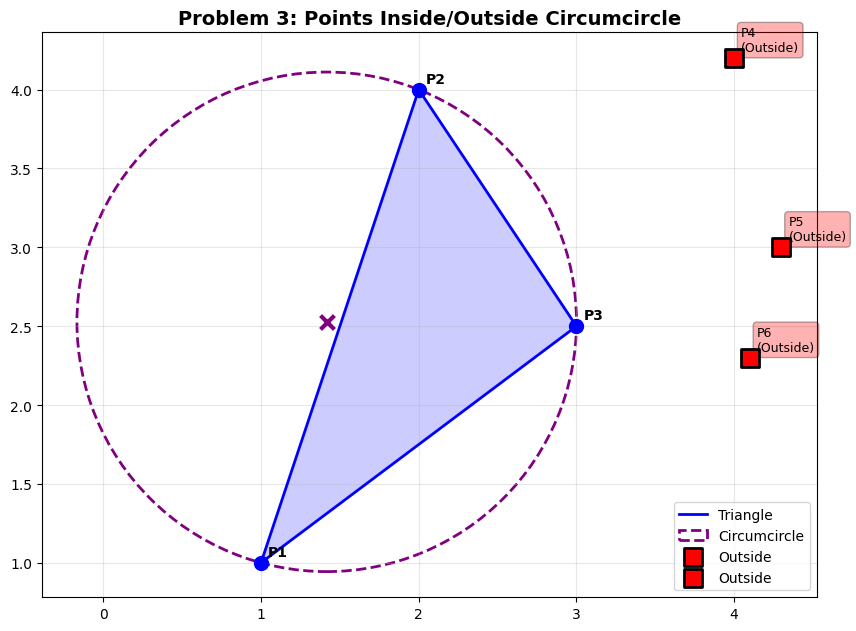

In [7]:
# Visualize Problem 3
fig, ax = plt.subplots(figsize=(10, 10))

xs = [test_triangle[0][0], test_triangle[1][0], test_triangle[2][0], test_triangle[0][0]]
ys = [test_triangle[0][1], test_triangle[1][1], test_triangle[2][1], test_triangle[0][1]]
ax.plot(xs, ys, 'b-', linewidth=2, label='Triangle')
ax.fill(xs, ys, alpha=0.2, color='blue')

for i, (x, y) in enumerate(test_triangle, 1):
    ax.scatter(x, y, c='blue', s=100, zorder=5)
    ax.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

circle_data = calculate_circumcircle(test_triangle[0], test_triangle[1], test_triangle[2])
if circle_data:
    center_x, center_y, radius = circle_data
    circ = Circle((center_x, center_y), radius, fill=False, edgecolor='purple', 
                  linewidth=2, linestyle='--', label='Circumcircle')
    ax.add_patch(circ)
    ax.scatter(center_x, center_y, c='purple', s=100, marker='x', linewidths=3, zorder=6)

for i, point in enumerate(test_pts, 4):
    is_inside = point_in_circumcircle(point, test_triangle)
    color = 'green' if is_inside else 'red'
    marker = 'o' if is_inside else 's'
    label = 'Inside' if is_inside else 'Outside'
    
    ax.scatter(point[0], point[1], c=color, s=150, marker=marker, zorder=7, 
              edgecolors='black', linewidths=2,
              label=label if i == 4 or (i == 5 and not is_inside) else '')
    ax.annotate(f'P{i}\n({label})', point, xytext=(5, 5), textcoords='offset points', 
               fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3))

ax.set_aspect('equal')
ax.set_title('Problem 3: Points Inside/Outside Circumcircle', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.show()

---
## Problem 4: Non-shared Sides

In [8]:
def get_edges(triangle):
    return [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]

def normalize_edge(edge):
    p1, p2 = edge
    if p1 < p2:
        return (p1, p2)
    else:
        return (p2, p1)

def find_unique_edges(triangles):
    edge_count = {}
    
    for triangle in triangles:
        edges = get_edges(triangle)
        for edge in edges:
            normalized = normalize_edge(edge)
            edge_count[normalized] = edge_count.get(normalized, 0) + 1
    
    unique_edges = [edge for edge, count in edge_count.items() if count == 1]
    return unique_edges

if len(points) >= 5:
    sample_triangles = [
        [points[0], points[1], points[2]],
        [points[0], points[2], points[3]],
        [points[2], points[3], points[4]]
    ]
    unique = find_unique_edges(sample_triangles)
    
    print(f"Sample triangles:")
    for i, tri in enumerate(sample_triangles, 1):
        print(f"  Triangle {i}: vertices at indices [1, {sample_triangles.index(tri)+2}, {sample_triangles.index(tri)+3}]")
    
    print(f"\nTotal edges: {len(sample_triangles) * 3}")
    print(f"Unique (non-shared) edges: {len(unique)}")
    print(f"Shared edges: {(len(sample_triangles) * 3 - len(unique)) // 2}")

Sample triangles:
  Triangle 1: vertices at indices [1, 2, 3]
  Triangle 2: vertices at indices [1, 3, 4]
  Triangle 3: vertices at indices [1, 4, 5]

Total edges: 9
Unique (non-shared) edges: 5
Shared edges: 2


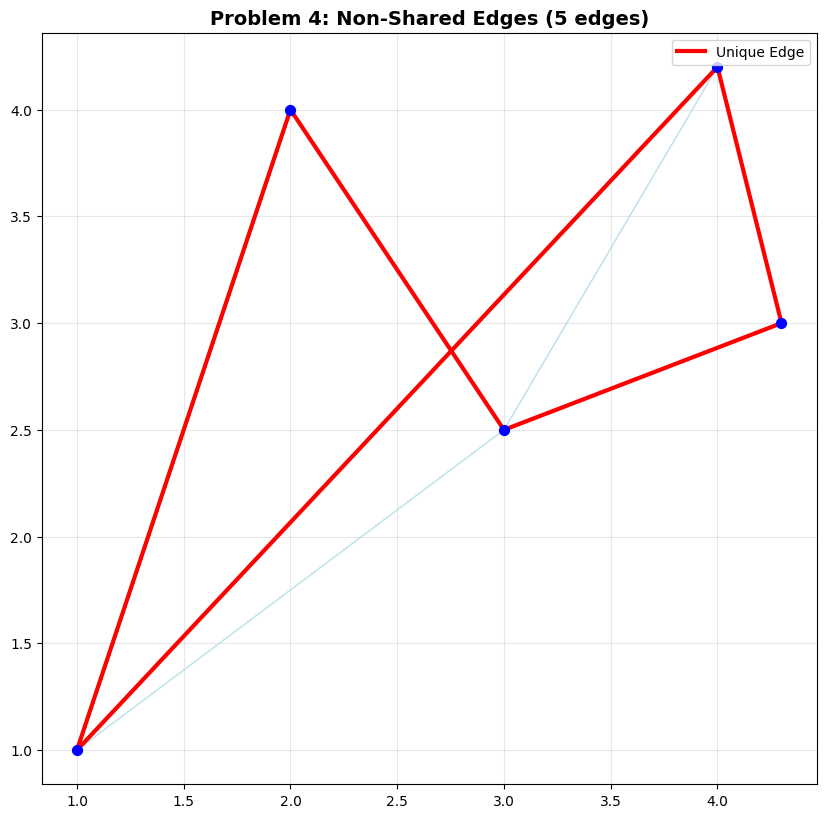

In [9]:
# Visualize Problem 4
fig, ax = plt.subplots(figsize=(10, 10))

all_points_set = set()
for triangle in sample_triangles:
    xs = [triangle[0][0], triangle[1][0], triangle[2][0], triangle[0][0]]
    ys = [triangle[0][1], triangle[1][1], triangle[2][1], triangle[0][1]]
    ax.plot(xs, ys, 'lightblue', linewidth=1, alpha=0.5)
    all_points_set.update(triangle)

for edge in unique:
    xs = [edge[0][0], edge[1][0]]
    ys = [edge[0][1], edge[1][1]]
    ax.plot(xs, ys, 'r-', linewidth=3, label='Unique Edge' if edge == unique[0] else '')

if all_points_set:
    pts_x, pts_y = zip(*all_points_set)
    ax.scatter(pts_x, pts_y, c='blue', s=50, zorder=5)

ax.set_aspect('equal')
ax.set_title(f'Problem 4: Non-Shared Edges ({len(unique)} edges)', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.show()

---
## Problem 5: Graphics

In [10]:
def find_bad_triangles(point, triangles):
    bad_triangles = []
    for triangle in triangles:
        if point_in_circumcircle(point, triangle):
            bad_triangles.append(triangle)
    return bad_triangles

def bowyer_watson(points):
    if len(points) < 3:
        return []
    
    super_triangle = create_super_triangle(points)
    triangles = [super_triangle]
    
    for point in points:
        bad_triangles = find_bad_triangles(point, triangles)
        unique_edges = find_unique_edges(bad_triangles)
        
        for bad_tri in bad_triangles:
            triangles.remove(bad_tri)
        
        for edge in unique_edges:
            new_triangle = [edge[0], edge[1], point]
            triangles.append(new_triangle)
    
    final_triangles = []
    for triangle in triangles:
        if not any(vertex in super_triangle for vertex in triangle):
            final_triangles.append(triangle)
    
    return final_triangles

triangles = bowyer_watson(points)

print(f"Generated {len(triangles)} triangles\n")
print("Triangles (vertex indices):")
for i, triangle in enumerate(triangles, 1):
    indices = []
    for vertex in triangle:
        if vertex in points:
            indices.append(points.index(vertex) + 1)
    print(f"  Triangle {i}: vertices {indices}")

Generated 15 triangles

Triangles (vertex indices):
  Triangle 1: vertices [1, 2, 3]
  Triangle 2: vertices [2, 3, 4]
  Triangle 3: vertices [3, 4, 5]
  Triangle 4: vertices [1, 3, 6]
  Triangle 5: vertices [3, 5, 6]
  Triangle 6: vertices [4, 5, 7]
  Triangle 7: vertices [6, 5, 8]
  Triangle 8: vertices [5, 7, 8]
  Triangle 9: vertices [2, 4, 9]
  Triangle 10: vertices [4, 7, 9]
  Triangle 11: vertices [1, 6, 10]
  Triangle 12: vertices [6, 8, 10]
  Triangle 13: vertices [7, 8, 11]
  Triangle 14: vertices [7, 9, 11]
  Triangle 15: vertices [8, 10, 11]


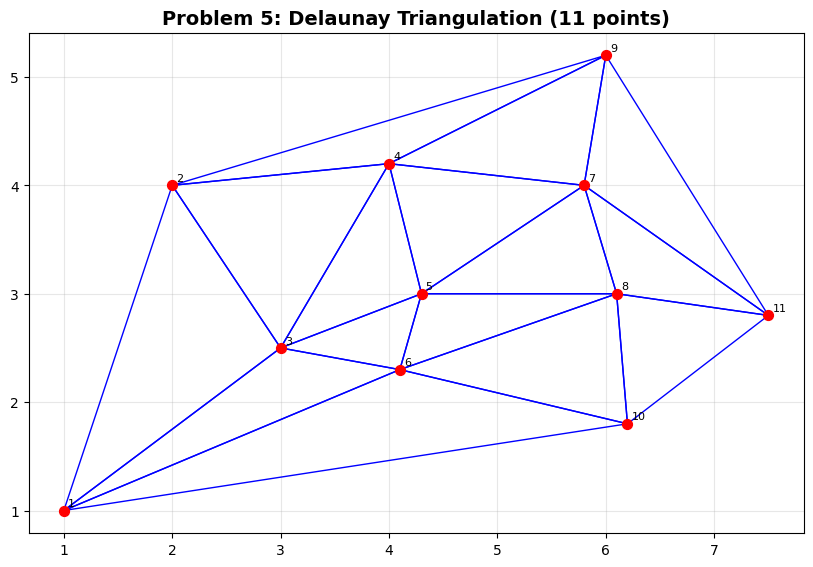

In [11]:
# Visualize Problem 5 - Basic Triangulation
fig, ax = plt.subplots(figsize=(10, 10))

for triangle in triangles:
    xs = [triangle[0][0], triangle[1][0], triangle[2][0], triangle[0][0]]
    ys = [triangle[0][1], triangle[1][1], triangle[2][1], triangle[0][1]]
    ax.plot(xs, ys, 'b-', linewidth=1)

if points:
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    ax.scatter(xs, ys, c='red', s=50, zorder=5)
    
    for i, (x, y) in enumerate(points, 1):
        ax.annotate(f'{i}', (x, y), xytext=(3, 3), textcoords='offset points', fontsize=8)

ax.set_aspect('equal')
ax.set_title(f'Problem 5: Delaunay Triangulation ({len(points)} points)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

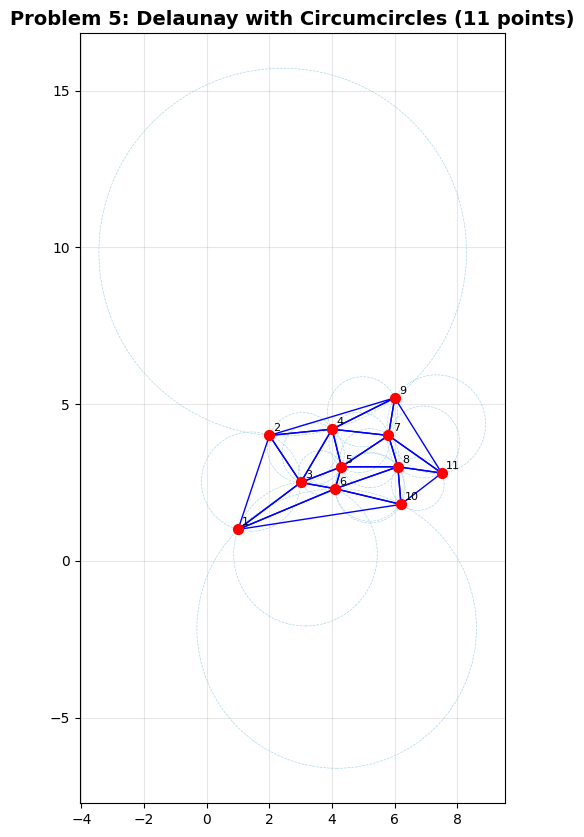

In [12]:
# Visualize Problem 5
fig, ax = plt.subplots(figsize=(10, 10))

for triangle in triangles:
    xs = [triangle[0][0], triangle[1][0], triangle[2][0], triangle[0][0]]
    ys = [triangle[0][1], triangle[1][1], triangle[2][1], triangle[0][1]]
    ax.plot(xs, ys, 'b-', linewidth=1)

for triangle in triangles:
    circle_data = calculate_circumcircle(triangle[0], triangle[1], triangle[2])
    if circle_data:
        center_x, center_y, radius = circle_data
        circ = Circle((center_x, center_y), radius, fill=False, 
                     edgecolor='lightblue', linestyle='--', linewidth=0.5)
        ax.add_patch(circ)

if points:
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    ax.scatter(xs, ys, c='red', s=50, zorder=5)
    
    for i, (x, y) in enumerate(points, 1):
        ax.annotate(f'{i}', (x, y), xytext=(3, 3), textcoords='offset points', fontsize=8)

ax.set_aspect('equal')
ax.set_title(f'Problem 5: Delaunay with Circumcircles ({len(points)} points)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

---
## Problem 6: Delaunay Triangulation - Complete Algorithm

In [13]:
print("Verifying Delaunay property...\n")

violations = 0
for tri_idx, triangle in enumerate(triangles):
    circle = calculate_circumcircle(triangle[0], triangle[1], triangle[2])
    if circle:
        for pt_idx, point in enumerate(points):
            if point not in triangle:
                if point_in_circumcircle(point, triangle):
                    violations += 1
                    print(f"  WARNING: Point {pt_idx+1} violates triangle {tri_idx+1}")

if violations == 0:
    print("All triangles satisfy the Delaunay property!")
    print("No points lie inside any circumcircle (except triangle vertices)")
else:
    print(f"\n✗ Found {violations} violations of Delaunay property")

Verifying Delaunay property...

All triangles satisfy the Delaunay property!
No points lie inside any circumcircle (except triangle vertices)


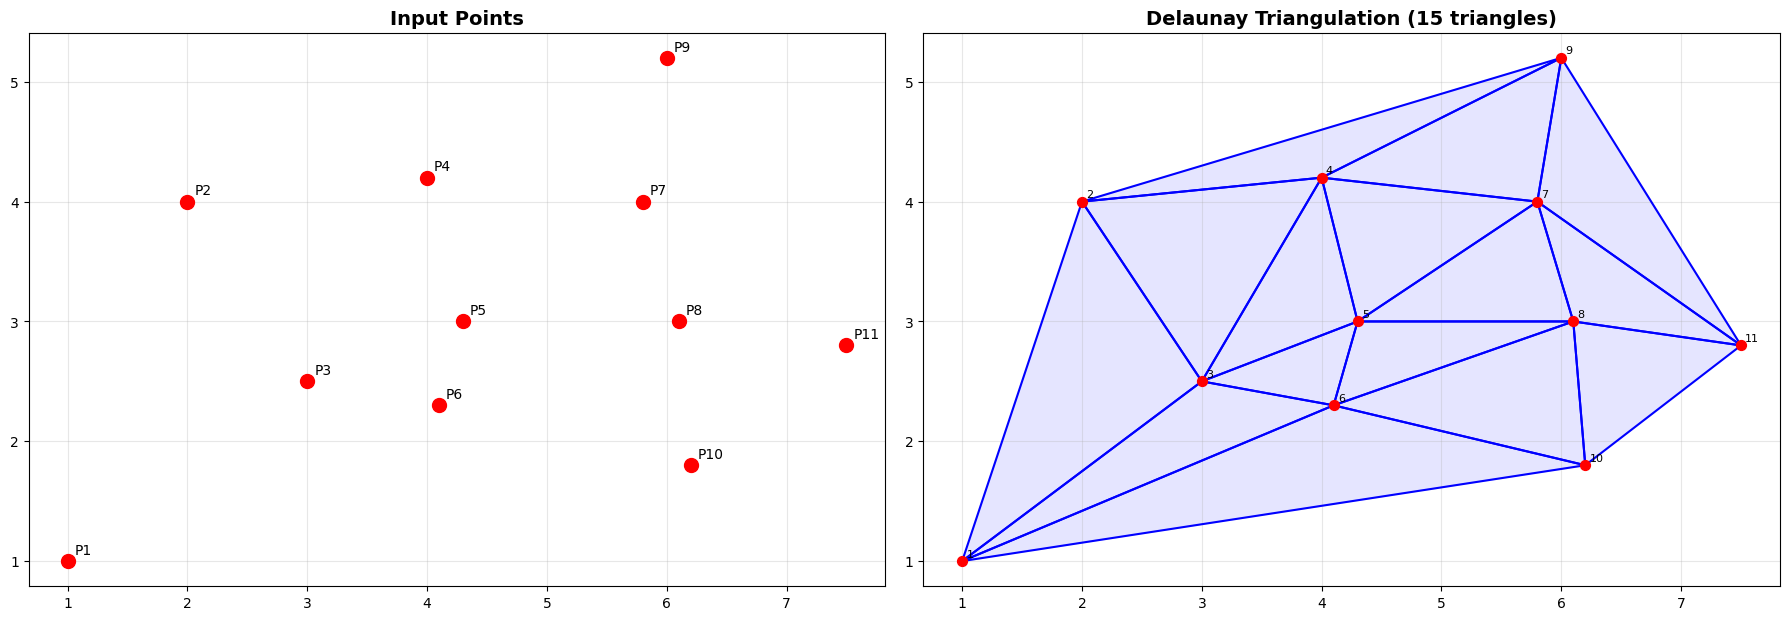

In [14]:
# Final visualization comparing input points vs triangulated mesh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

if points:
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    ax1.scatter(xs, ys, c='red', s=100, zorder=5)
    for i, (x, y) in enumerate(points, 1):
        ax1.annotate(f'P{i}', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)

ax1.set_aspect('equal')
ax1.set_title('Input Points', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

for triangle in triangles:
    xs = [triangle[0][0], triangle[1][0], triangle[2][0], triangle[0][0]]
    ys = [triangle[0][1], triangle[1][1], triangle[2][1], triangle[0][1]]
    ax2.plot(xs, ys, 'b-', linewidth=1.5)
    ax2.fill(xs, ys, alpha=0.1, color='blue')

if points:
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    ax2.scatter(xs, ys, c='red', s=50, zorder=5)
    for i, (x, y) in enumerate(points, 1):
        ax2.annotate(f'{i}', (x, y), xytext=(3, 3), textcoords='offset points', fontsize=8)

ax2.set_aspect('equal')
ax2.set_title(f'Delaunay Triangulation ({len(triangles)} triangles)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()